In [97]:
# read the data
import pandas as pd
import os
import math
from matplotlib import pyplot as plt
data_path='dexmo_haptic_data'
list_csv=os.listdir(data_path)
# print(type(list_csv))


In [40]:
# description of dataset is such that the last row is the target, 
# the row[-2] is the Xn-t and row[0] is the Xn
# most important features are Xn and Xn-1 force vector
data_dict={}
for x in list_csv:
    df = pd.read_csv(os.path.join(data_path, x))
    print(f"{x[5:-4]}: {df.shape}")
    data_dict[x[5:-4]]={"data": df,"Xn": df.iloc[:,0],"Xn-1": df.iloc[:,1],"Y": df.iloc[:,2]}
    # print(df.head())


Index: (359, 3)
Middle: (179, 3)
Pinky: (300, 3)
Ring: (119, 3)
Thumb: (299, 3)


In [74]:
# Inference on the dataset
print(data_dict.keys())

# webber classifier 
non_fealt_xn_web=[]
fealt_xn_web=[]
xn_diff_web=[]
xn=data_dict["Index"]["Xn"]
xn_1=data_dict["Index"]["Xn-1"]
yn=data_dict["Index"]["Y"]

print(data_dict["Index"]["data"].shape)
diff = abs((xn - xn_1) / xn_1)
# all the difference of (X_n - X_{n-1}) / (X_{n-1})
xn_diff_web = list(diff)
xn_diff_web = [d_val for d_val in xn_diff_web if not math.isinf(d_val)]

# getting all the non perceived dots-> 
non_fealt_xn_web = [d if y == -1 else -100 for d, y in zip(xn_diff_web, yn)]
# getting all the perceived dots
fealt_xn_web = [d if (y == 1 and d is not math.isinf(d)) else -100 for d, y in zip(xn_diff_web, yn)]





# xn_diff_web = [d_val for d_val in xn_diff_web if not math.isinf(d_val)]
# non_fealt_xn_web = [l1 for d_val, l1 in zip(xn_diff_web, non_fealt_xn_web) if not math.isinf(d_val)]
# fealt_xn_web = [l2 for d_val, l2 in zip(xn_diff_web, fealt_xn_web) if not math.isinf(d_val)]


dict_keys(['Index', 'Middle', 'Pinky', 'Ring', 'Thumb'])
(359, 3)


In [76]:
print(len(non_fealt_xn_web), len(fealt_xn_web), len(xn_diff_web))

354 354 354


In [89]:
fealt_arr_web=[x for x in fealt_xn_web if x != -100]
non_fealt_arr_web=[x for x in non_fealt_xn_web if x != -100]
# print(len(fealt_arr_web))
# print(len(non_fealt_arr_web))
# print(sum(fealt_arr_web))
# print(sum(non_fealt_arr_web))

mean_delta_optimestic = sum(fealt_arr_web) / len(fealt_arr_web)
mean_delta_pessimistic = sum(non_fealt_arr_web) / len(non_fealt_arr_web)

squared_diff_sum = sum((x - mean_delta_pessimistic)**2 for x in non_fealt_arr_web)
variance=squared_diff_sum/(len(non_fealt_arr_web)-1)
std_dev_delta = math.sqrt(variance)


In [ ]:
print(f"Mean webber constant delta :{mean_delta_pessimistic}\nVariance webber constant: {variance}\nStandard Deviation webber constant: {std_dev_delta}")
print(f"CV: {std_dev_delta/mean_delta_pessimistic}")

mean webber constant delta :0.8022745778378945
Variance webber constant: 1.8864540450124458
Standard Deviation webber constant: 1.373482451657991
CV: 1.7119855091999605


In [93]:
error_delta=[]

for x in range(len(xn_diff_web)):
    obs_current=(xn_diff_web[x])**2-(mean_delta_pessimistic*xn_1[x])**2
    if obs_current < 0:
        sign = -1
    elif obs_current == 0:
        sign = 0
    else:
        sign = 1

    summ_delta=(yn[x]-sign)**2
    error_delta.append(summ_delta)

# print(sum(error_delta))
mean_error_delta=(1/(4*len(xn_diff_web))) *sum(error_delta)
# print(mean_error_delta)
squared_diff_sum = sum((x/4 - mean_error_delta) ** 2 for x in error_delta)
variance_error_delta=squared_diff_sum/(len(error_delta)-1)
std_dev_error_delta = math.sqrt(variance_error_delta)

In [95]:
print(f"mean error webber classifier: {mean_error_delta}\nVariance error webber classifier: {variance_error_delta}\nStandard Deviation webber constant: {std_dev_error_delta}")
print(f"CV: {std_dev_error_delta/mean_error_delta}")

mean error webber classifier: 0.3107344632768362
Variance error webber classifier: 0.21478529472959815
Standard Deviation webber constant: 0.4634493442973009
CV: 1.491464253465859


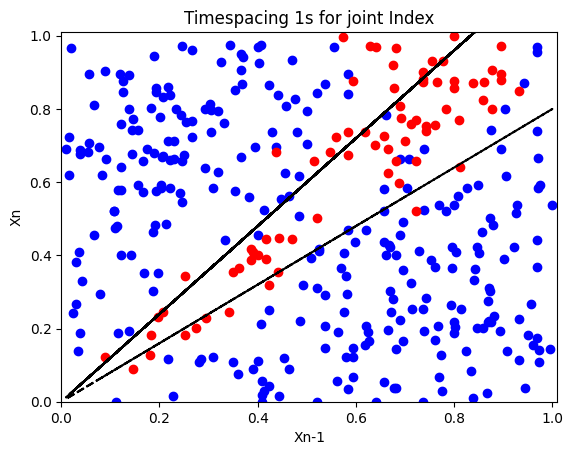

In [98]:
blue_tick=[]
red_tick=[]

index_correct_c=[]
index_incorrect_c=[]
xn_diff=[]
for x in range (len(xn)):
    if yn[x]==-1:
        index_incorrect_c.append(x)
    elif yn[x]==1:
        index_correct_c.append(x)




for x in range (len(xn)):
    if x in index_incorrect_c:
        red_tick.append(xn[x])
        blue_tick.append(-100)
    else:
        blue_tick.append(xn[x])
        red_tick.append(-100)


slope = 0.2
mean_delta_pessimistic = 0
intercept = 0


line_above = (1-slope) * xn + intercept
line_below= (1+slope)*xn - intercept

plt.plot(xn, line_above, color='black', linestyle='--', label='Straight Line')
plt.plot(xn, line_below, color='black', linestyle='--', label='Straight Line')

# print("size matric")
# print(fealt_xn,non_fealt_xn)
plt.scatter(blue_tick,xn_1,c="blue")
plt.scatter(red_tick,xn_1,c="red")
#plt.scatter(xn,xn_1,c="green")
plt.xlim(0, 1.01)
plt.ylim(0, 1.01)
plt.xlabel('Xn-1')
plt.ylabel('Xn')
plt.title('Timespacing 1s for joint Index')
plt.savefig("webber_eas_Index.svg")
plt.show()

In [ ]:
# # Check and print missing values in each CSV file
# import pandas as pd
# import os

# # data_path = os.path.join(data_path, list_csv[0])  # Example path, change as needed
# # list_csv = os.listdir(data_path)

# for csv_file in list_csv:
#     df = pd.read_csv(os.path.join(data_path, csv_file))
#     missing_count = df.isnull().sum().sum()
#     print(f"{csv_file}: Total missing values = {missing_count}")
#     if missing_count > 0:
#         print(df.isnull().sum())
#         print(df[df.isnull().any(axis=1)])

data_Index.csv: Total missing values = 0
data_Middle.csv: Total missing values = 0
data_Pinky.csv: Total missing values = 0
data_Ring.csv: Total missing values = 0
data_Thumb.csv: Total missing values = 0
